In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('../../../../STUDY/[Skillbox] Профессия‌ ‌Data‌ ‌Scientist‌ (2020)/1 Data Scientist. ML. Начальный уровень/03/3.10_non_linear.csv')

In [3]:
data.head(5)
plt.show()

In [4]:
reg = LinearRegression().fit(data[['x_train']], data.y_train)   #без reshape
# data.x_train    #series
# data[['x_train']]   #df

y_pred = reg.predict(data[['x_train']])

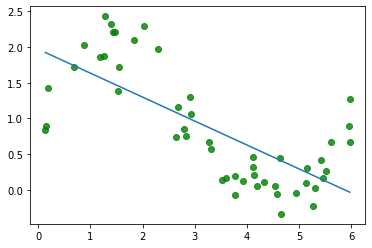

In [5]:
plt.plot(data.x_train, y_pred)
plt.scatter(data.x_train, data.y_train, alpha=0.8, c='g', label='data')
plt.show()

Очень плохо отображает наши данные

In [10]:
#строим полином по нашим данным для любой введенной степени
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до degree возводим x в эту степень
    """
    return np.array([source_data**n for n in range(1, degree+1)]).T



Мы каждый элемент превращаем в массив из 5 элементов каждой степени

In [14]:
degree = 5
X = generate_degrees(data.x_train, degree)
# X

Напишем функцию, которая принимает степень полнома и строит полином по нашим данным

In [15]:
from sklearn.metrics import mean_squared_error


def train_polynomial(degree, data):
    """Генерим данные, тренируем модель
    дополнительно рисуем график"""
    X = generate_degrees(data.x_train, degree)
    model = LinearRegression().fit(X, data.y_train)
    y_pred = model.predict(X)
    error = mean_squared_error(data.y_train, y_pred)
    print('Степень полинома %d Ошибка %.3f' % (degree, error))
    plt.scatter(data.x_train, data.y_train,40,'g','o', alpha=0.8, label='data')
    plt.plot(data.x_train, y_pred)

Степень полинома 2 Ошибка 0.298
Степень полинома 3 Ошибка 0.071
Степень полинома 5 Ошибка 0.067
Степень полинома 25 Ошибка 0.106


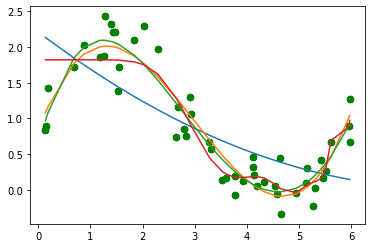

In [21]:
train_polynomial(degree=2, data=data)
train_polynomial(degree=3, data=data)
train_polynomial(degree=5, data=data)
train_polynomial(degree=25, data=data)

На 25 степени ошибка резко выросал и гнужно брать значения с минимально ошибкой - точка минимума

Чем больше степень, тем хуже она описывает общие данные и ближе находится к тренировочным точкам(переобучение??)

ПАДАЕТ ОБОБЩАЮЩАЯ СПОСОБНОСТЬ